# Random Stock Price Generator

One major barrier to entry with quantitative finance is getting stock data. Its expensive to get historical data on a large universe of stocks, and there is a reasonable amount of maintainace in updating daily prices. We need a lot of data to train, validate, and test models. Previously, I only had enough to build the model but the sheer thought of overfitting. One day while commuting on the train, the idea hit me like a... train... 

If a stock price is a random variable that is normally distributed, well, its random! There are plenty of ways to generate random numbers from a normal distribution with numpy, and it only takes a little logic to build series that emulate a true stock. So lets do that. 

In [1]:
import seaborn as sb 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import string
import random
from datetime import datetime, timedelta
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0)

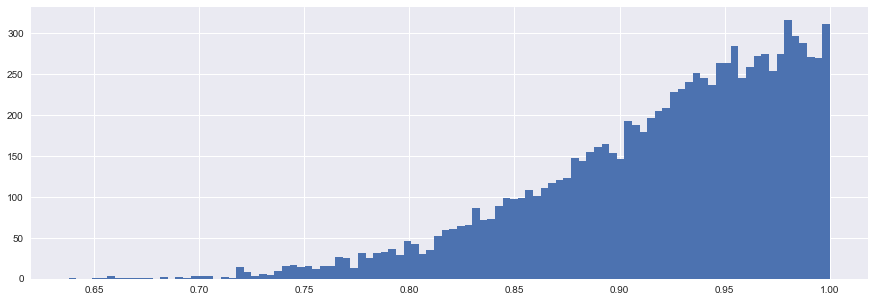

In [20]:
num = 1-np.abs(np.random.normal(0, 0.1, 10000))
plt.hist(num, bins=100);


In [5]:
#http://www.michaeljgrogan.com/monte-carlo-simulation-using-python/
def fake_stock(days, mu, vol, price, plot_=False):    
    '''
    days #Number of trading days 
    mu #Avg Daily Return
    vol #Volatility
    '''
    
    price = [price] #starting price 
    daily_returns = np.random.normal(loc=mu/days, scale=vol/np.sqrt(days), size=days) + 1
    for x in daily_returns:
        price.append(price[-1]*x)
    price = np.array(price)
    
    if plot_ == True: 
        plt.plot(price)
        plt.show()
        sb.kdeplot(price)
        plt.show()
    
    return price

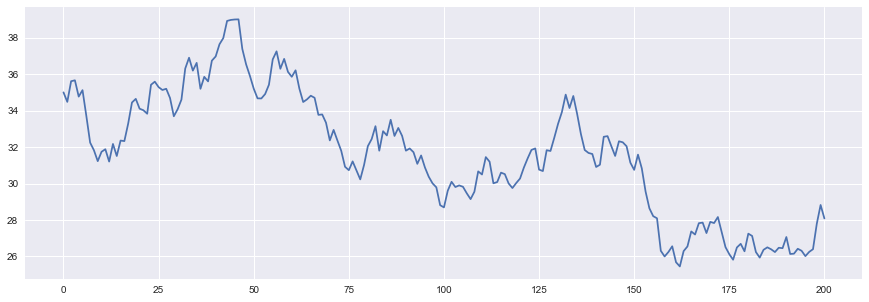

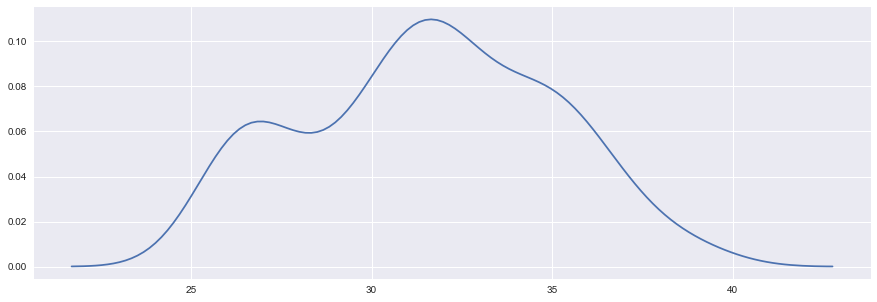

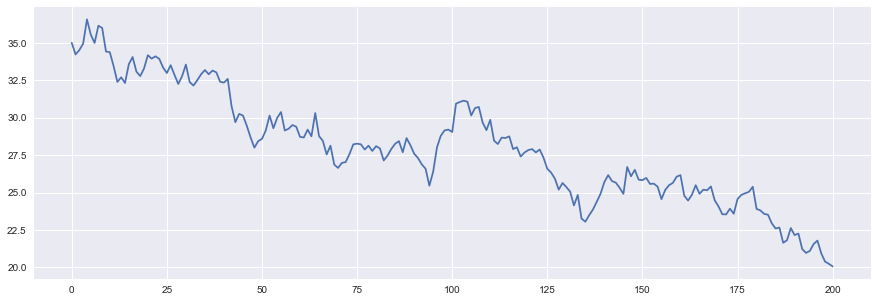

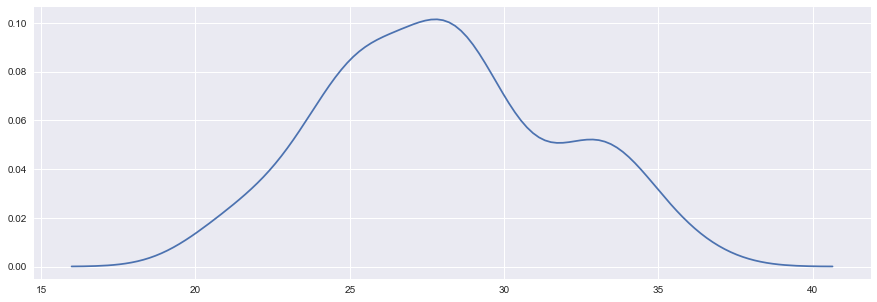

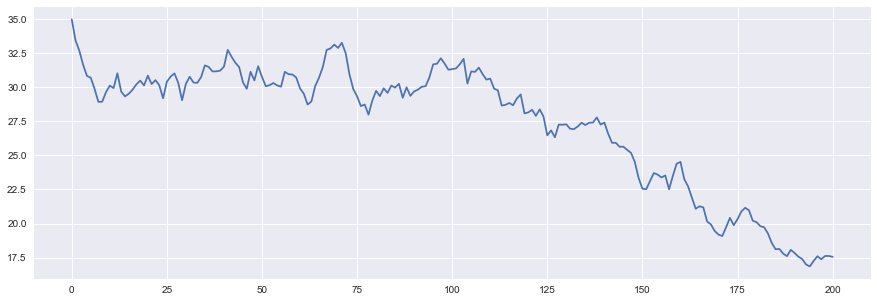

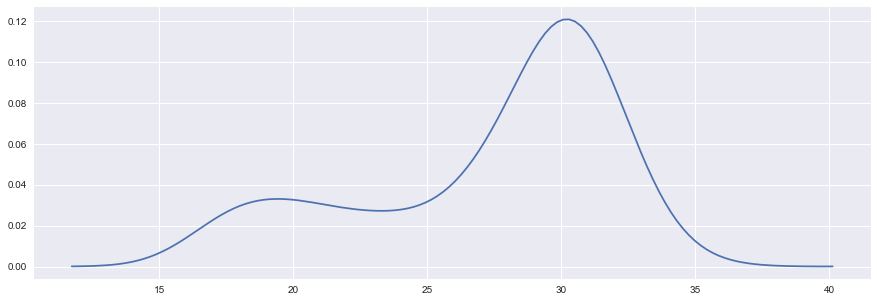

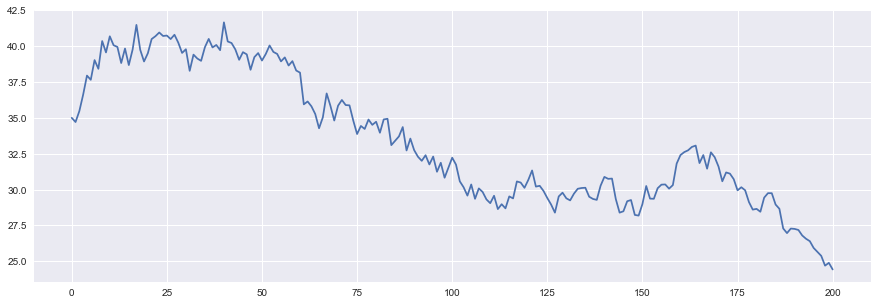

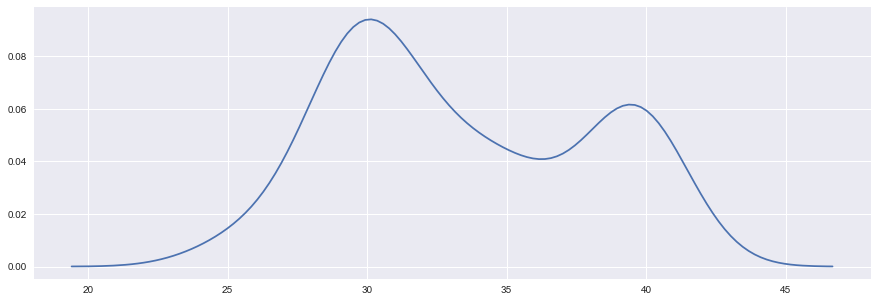

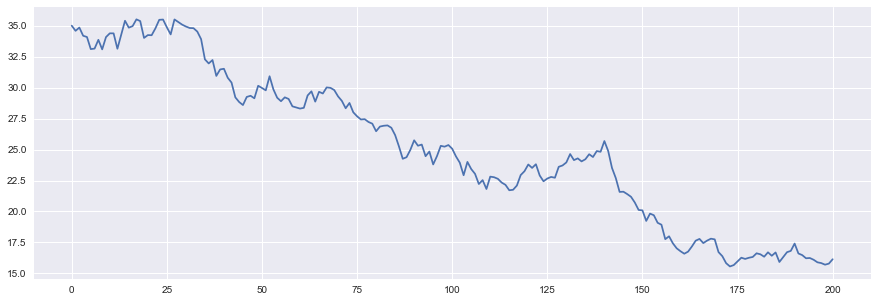

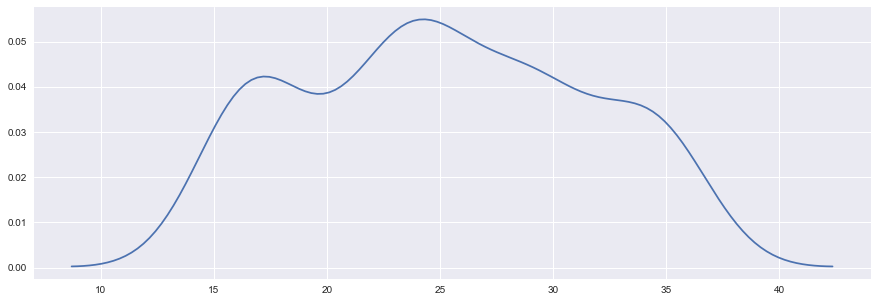

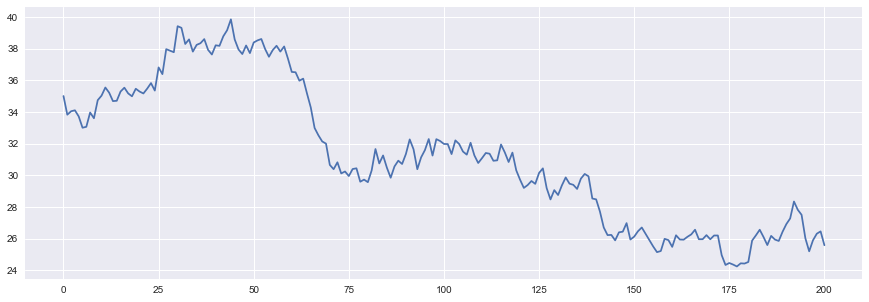

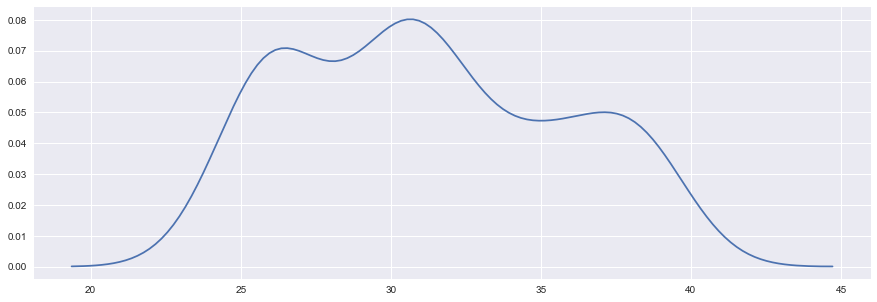

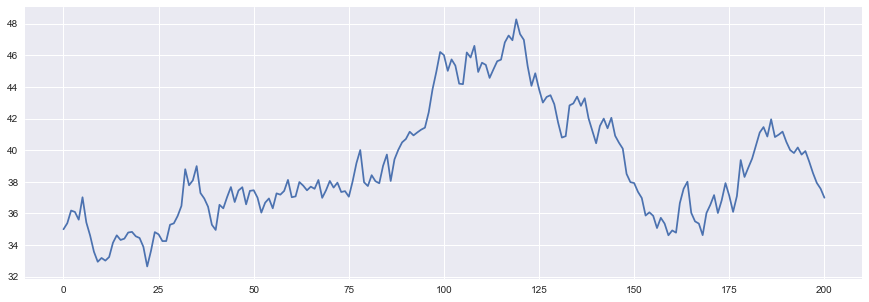

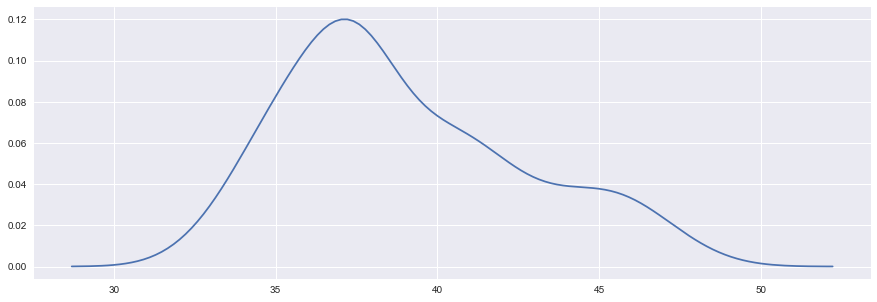

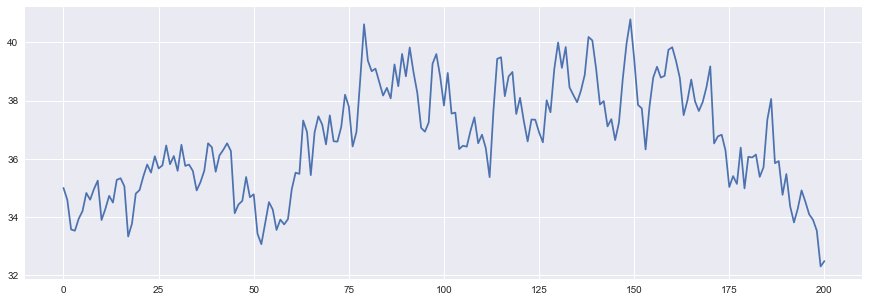

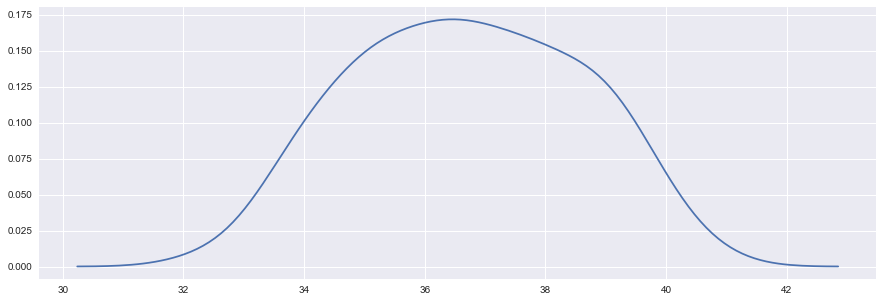

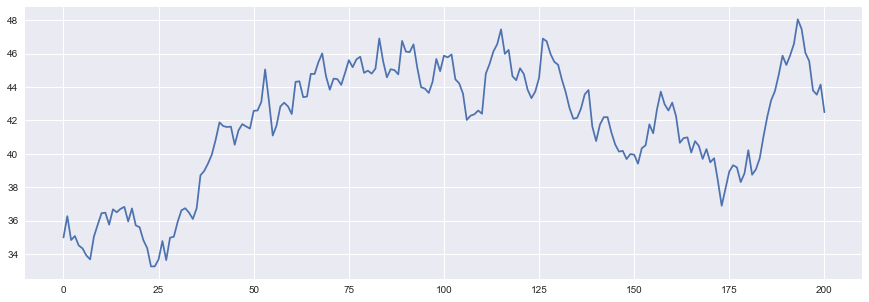

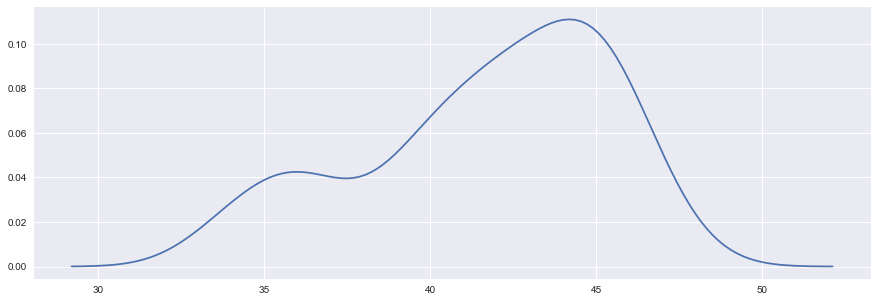

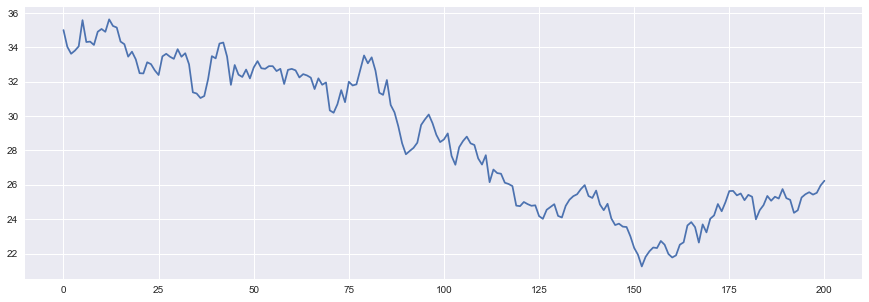

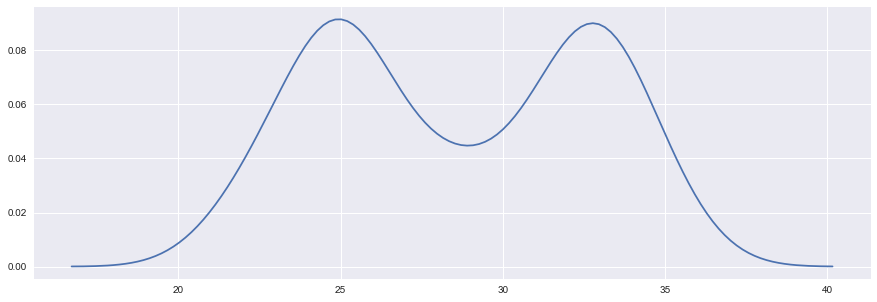

In [6]:
# test 
for i in range(10):
    fake_stock(200, -0.2, 0.3, 35, True)

Great! We have decenct control of the shape of the stocks while still maintaining randomness, and the KDE plots show that the distribtutions follow similar curves to what we observed with true stock price data. 

Now lets build a dataframe of these random stocks to train on. 

In [35]:
def id_generator(size=6, chars=string.ascii_uppercase + string.digits): 
    #for col/stock names
    return ''.join(random.choice(chars) for _ in range(size))

num_stocks = 500 #number of fake stocks to generate
trade_days = 1000
df = pd.DataFrame(data=np.random.random(size=(trade_days+1)), columns=['drop_me']) #init

IDs = [id_generator()] #init 
date = [str(datetime.now())[0:10]]

for i in range(num_stocks):
    #pick random values in range to seed the stock behavior 
    start_price = np.random.normal(100, 30)
    daily_returns = np.random.normal(-.3, .5)
    voltatility = np.random.uniform(.05, .4)
    
    #generate the stock and append to larger dataframe 
    stock = fake_stock(trade_days, daily_returns, voltatility, 100, False); 
    stock = pd.DataFrame(data=stock)
    df =pd.concat([df, stock], axis=1)
    IDs.append(id_generator())
    
for j in range(trade_days): #index 
    date.append(str(datetime.now()+ timedelta(days=-1-j))[0:10])
date = sorted(date, reverse=False)


df.columns = IDs #format 
df.index = date
df = df.iloc[:, 1:] #drop first col, error for some reason... 

In [36]:
df.tail();
df.describe();
df.head(10)

,R5IYRA,J7GFBR,XSFRZV,D048B5,RYRDLH,5XGRUC,WA0A1X,T512QE,UH9802,4HZAPA,...,PXLF2I,FGGA3X,LTMMLI,T68QV4,41TJ5T,WF7JBT,U3XQGG,WK6CPM,21X9GF,RT2L8G
2014-10-10,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-10-11,100.299436,99.109641,99.869762,99.505210,99.703183,100.249416,102.749599,100.333572,99.211215,99.036746,...,99.343021,99.634361,100.463608,99.783851,100.635562,100.124032,101.698574,100.124988,100.395799,99.605171
2014-10-12,99.857807,99.447460,100.210082,99.745595,99.920178,100.529682,104.066563,100.204402,99.040877,98.969731,...,98.541244,100.578931,101.541776,99.571965,101.460028,100.068710,102.787894,100.303632,100.354994,100.330217
2014-10-13,99.835763,99.855451,99.765656,100.159538,99.641215,99.971838,102.767376,100.484338,98.746128,99.240090,...,98.436000,99.864963,101.036768,99.753285,101.844601,99.909744,102.195616,100.490686,100.930558,100.406128
2014-10-14,99.536035,99.077687,99.524581,100.505495,99.501915,100.099110,104.429136,100.626484,99.620621,100.209546,...,98.987607,99.393268,101.748654,99.554402,101.518713,100.080205,101.205065,100.511684,101.591952,102.092409
2014-10-15,99.346877,99.096989,99.743537,99.888208,100.147284,100.526675,103.970648,100.738706,100.474322,101.086619,...,99.551434,96.675080,103.279594,99.646669,101.119407,99.805731,100.612301,100.703685,101.548994,102.241942
2014-10-16,99.425302,98.784549,98.458114,100.083021,100.054456,100.550961,104.422748,101.610861,100.433880,101.658914,...,99.759787,97.159368,102.378235,99.916295,101.960208,99.981035,99.908215,100.983680,101.544074,102.514417
2014-10-17,98.953277,98.731751,97.602926,100.512221,100.384290,100.964396,105.747225,102.602182,100.891992,101.439062,...,100.339862,96.788740,102.489052,100.206659,101.743287,99.773006,100.240011,100.929320,101.089634,101.690267
2014-10-18,99.107913,98.855332,97.546860,100.792051,99.766426,99.714546,106.853793,100.880437,100.576714,100.545790,...,99.986970,97.175577,99.652564,99.854743,102.788085,100.060383,98.945639,100.966746,101.764117,101.497983
2014-10-19,98.894507,97.988358,96.651229,100.443195,100.178707,98.123235,105.465312,100.167805,99.871312,99.609173,...,99.704999,96.925618,98.304138,99.598806,100.172434,99.947923,98.779151,101.131282,101.803449,101.238586


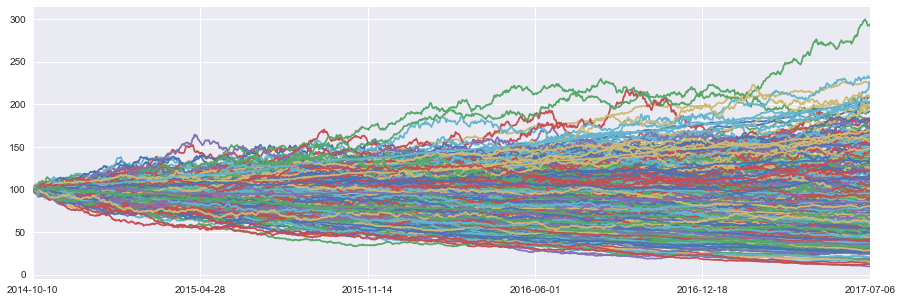

In [37]:
df.plot(legend=False)
plt.show()

These return streams look well distributed, with most stocks experiencing gains and losses of 50 dollars each way, and a few pushing down and up to $25 - 300. This reflects a pretty real world senario. These values will change every time the code is run since the hyperparameters are set from a random normal distribution, but the ranges should stay similar. 

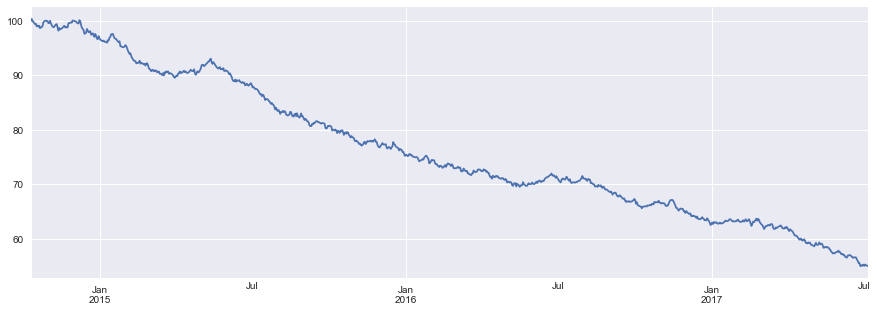

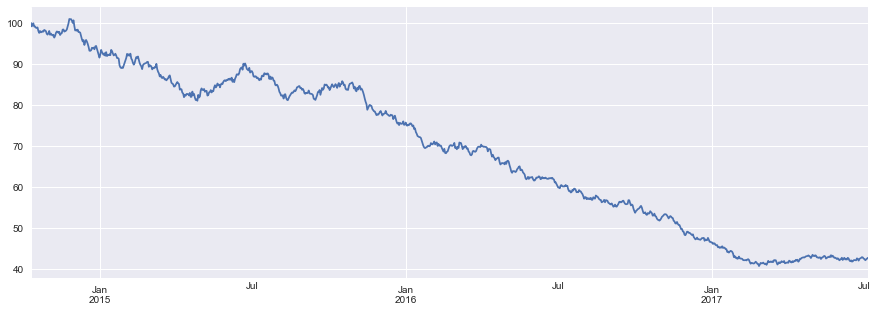

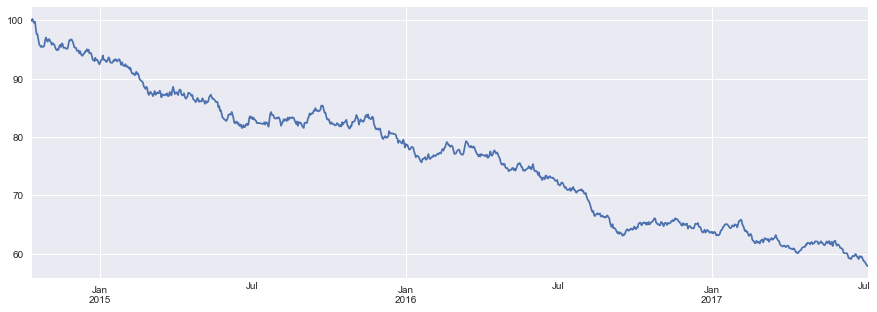

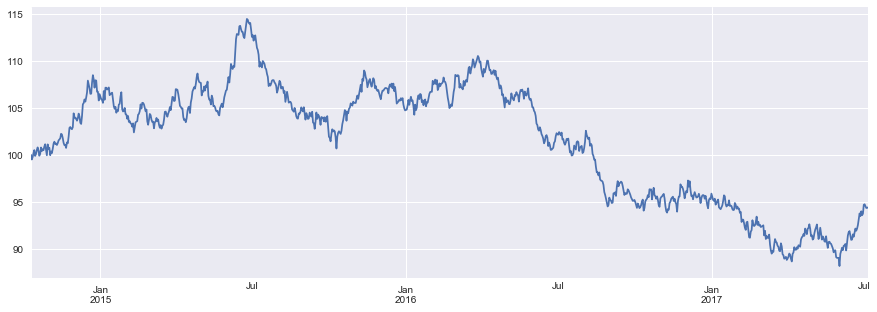

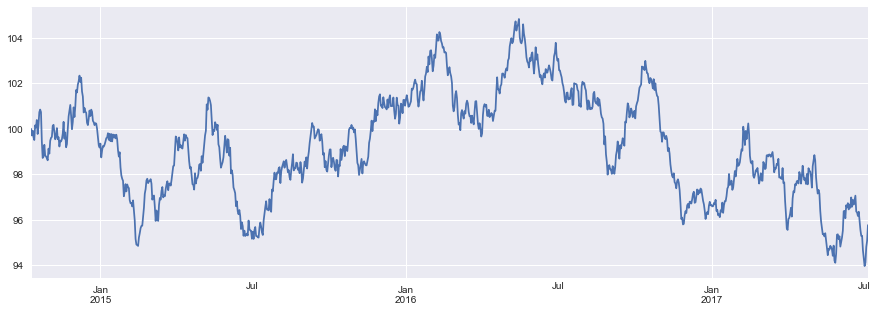

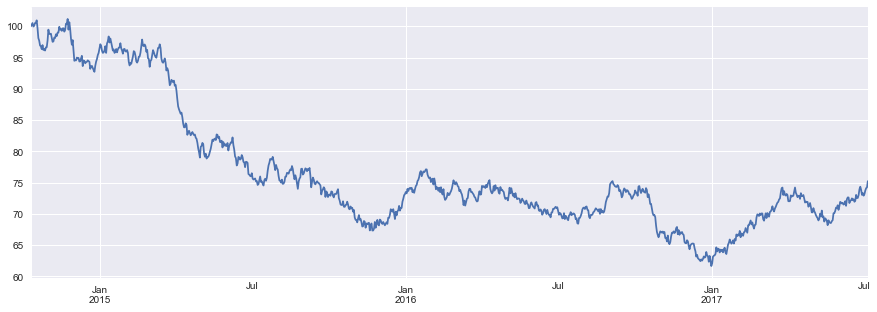

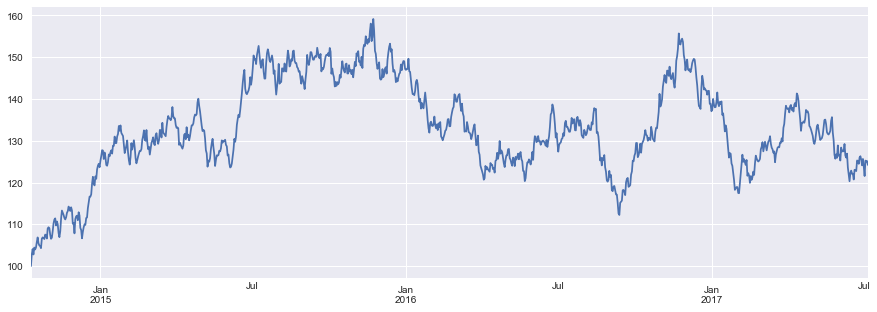

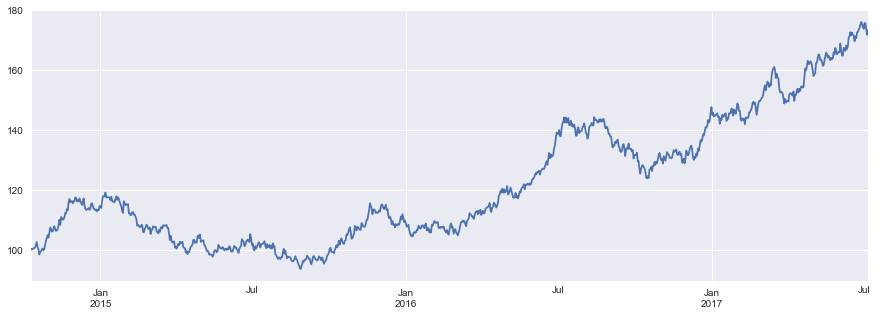

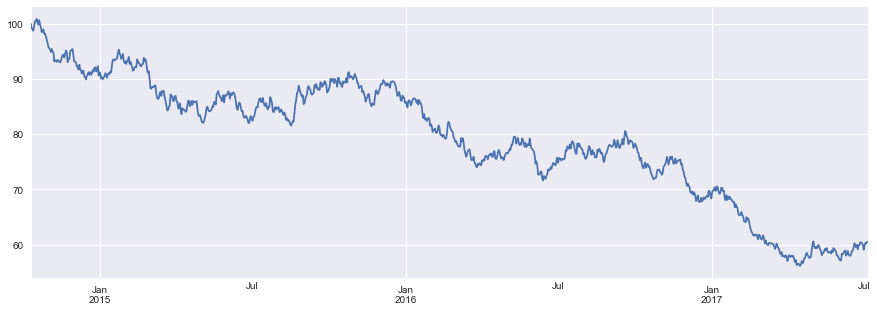

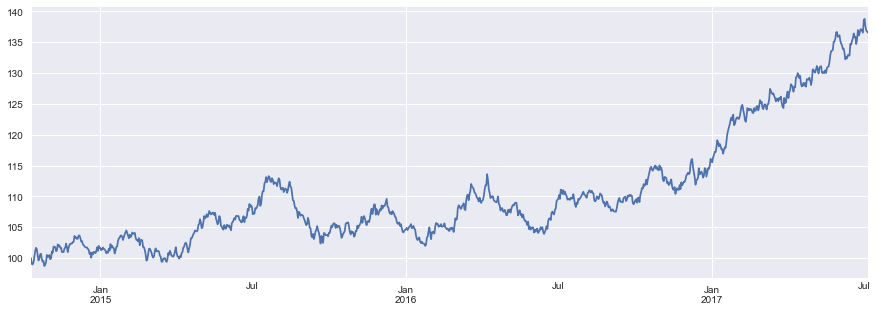

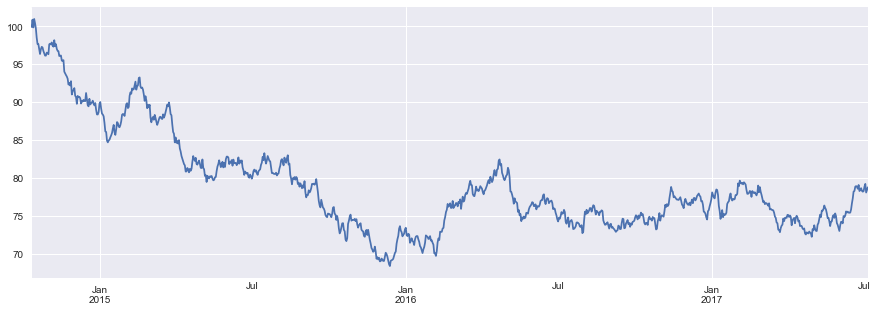

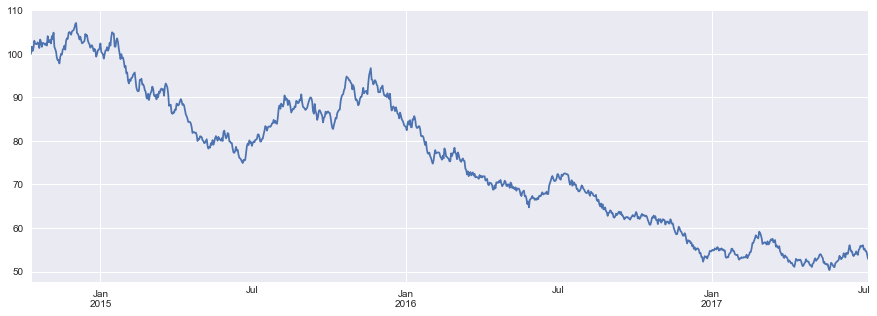

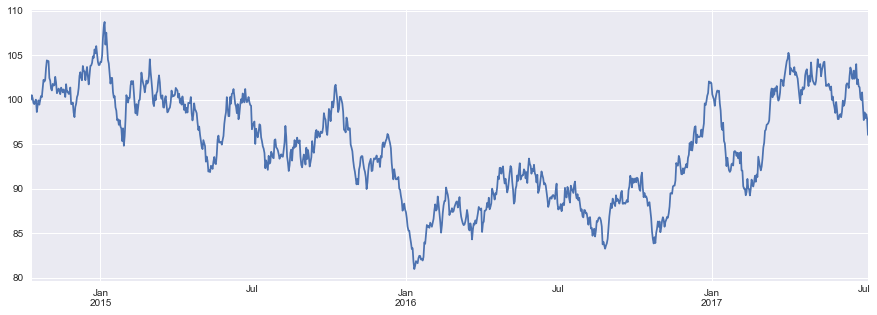

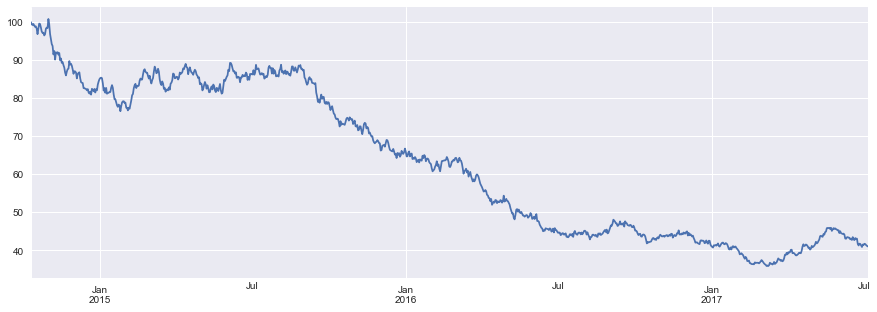

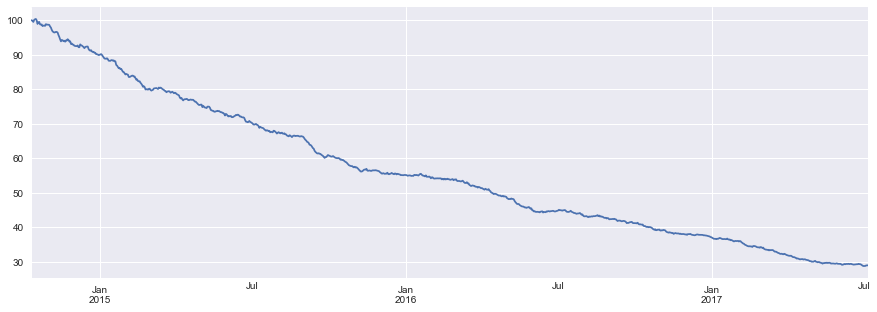

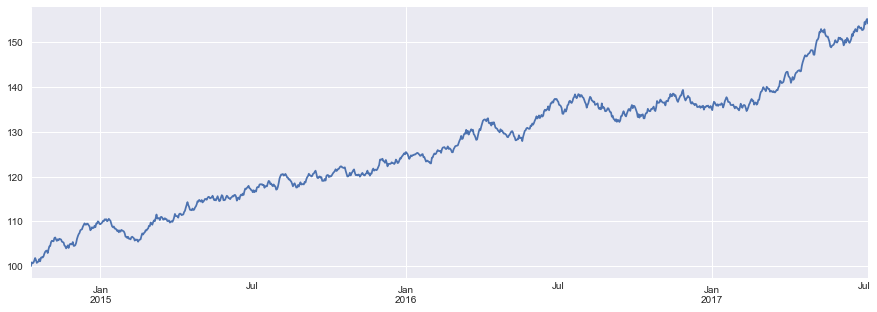

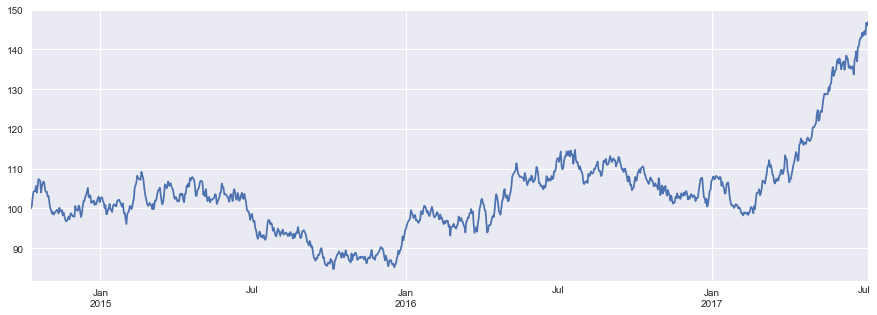

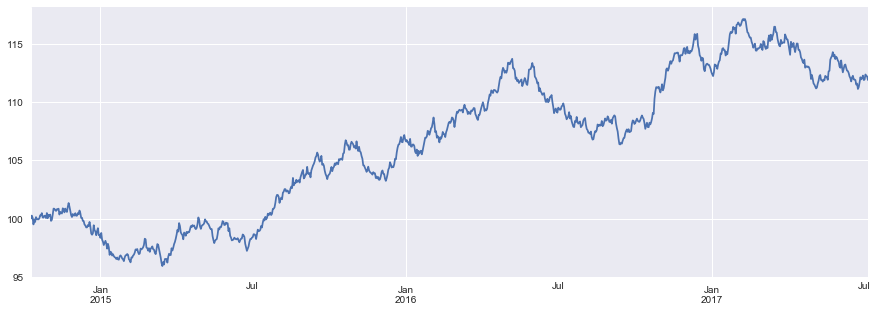

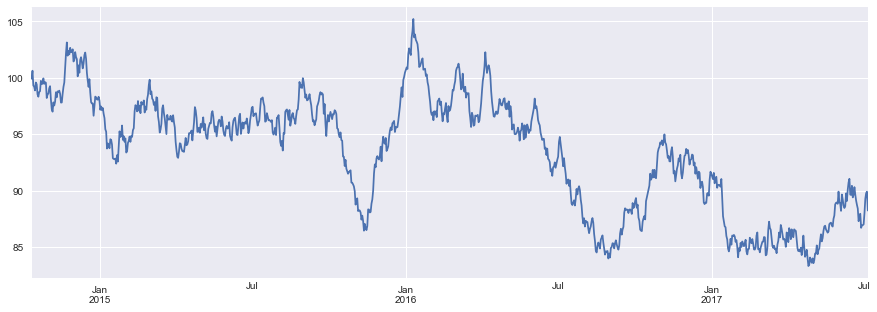

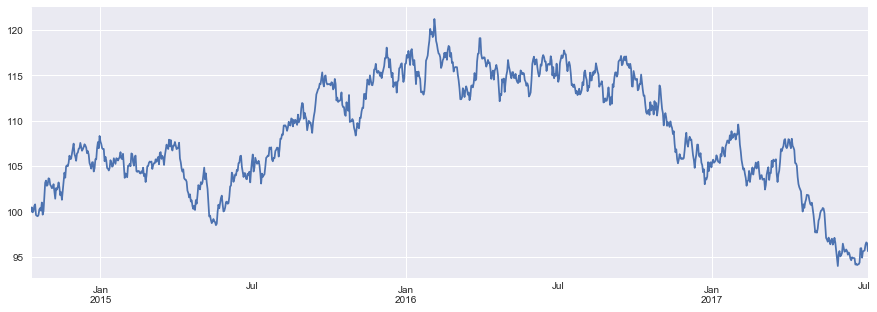

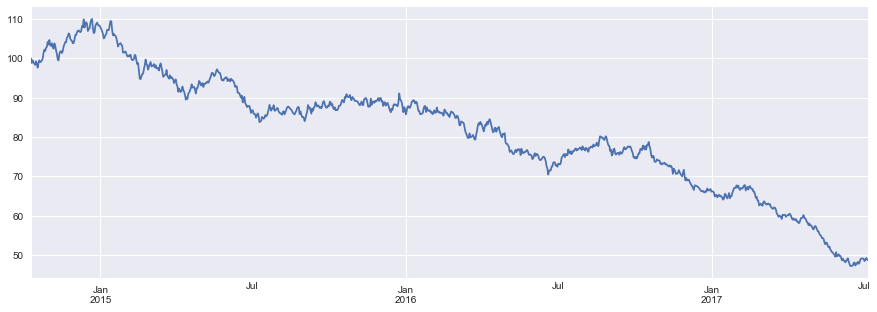

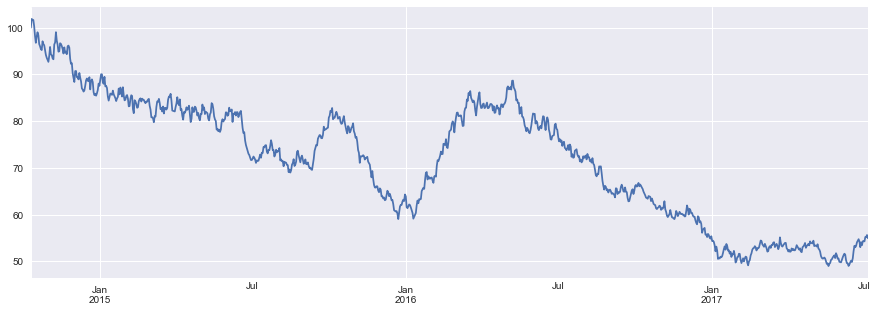

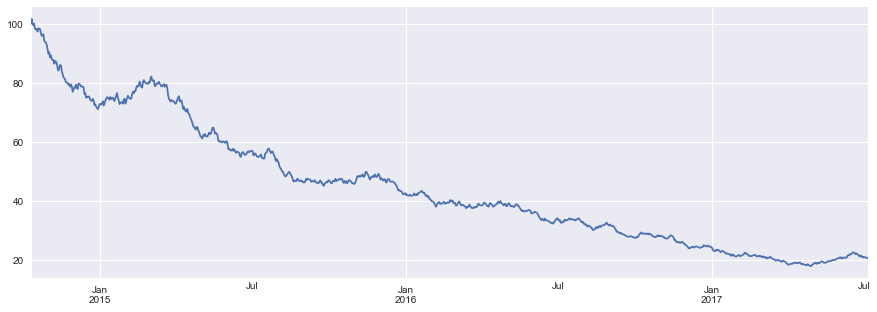

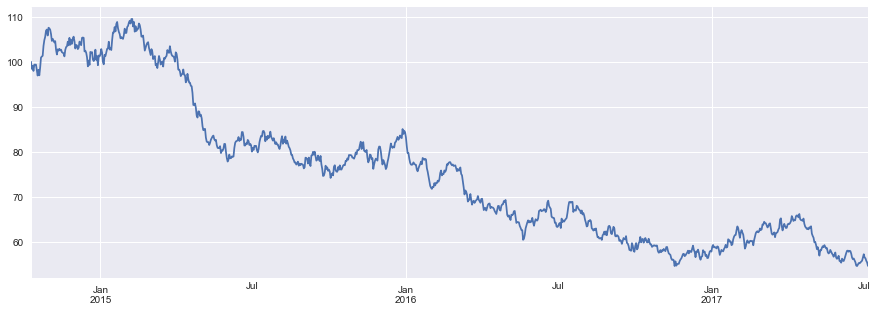

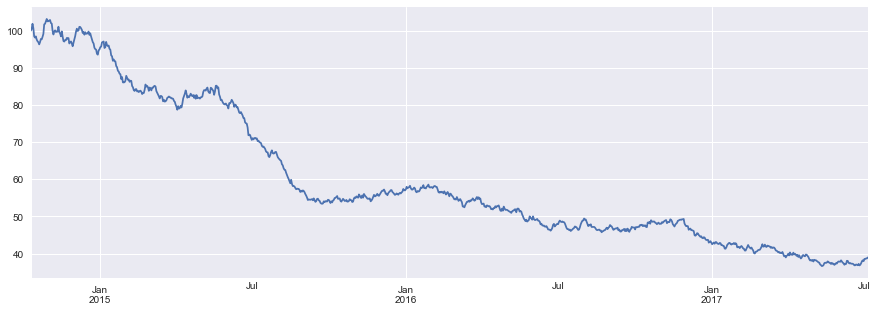

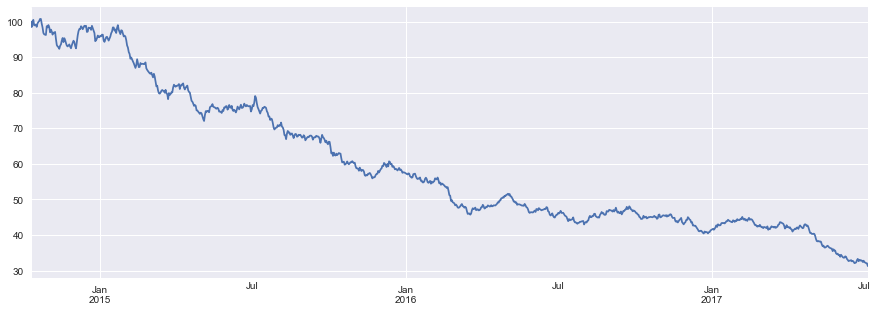

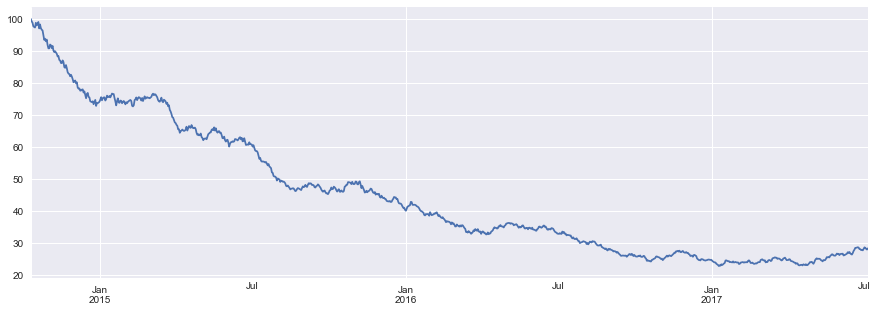

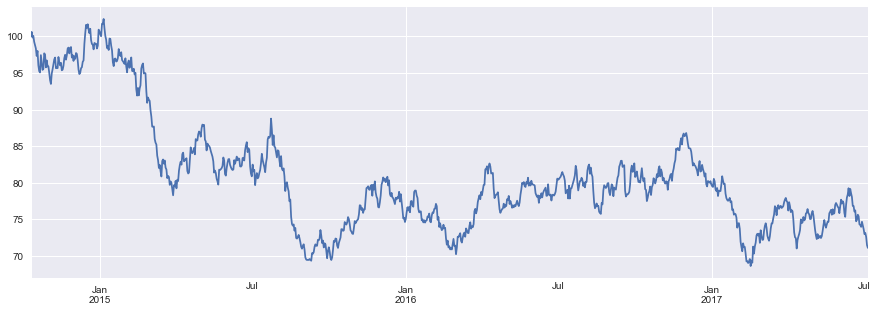

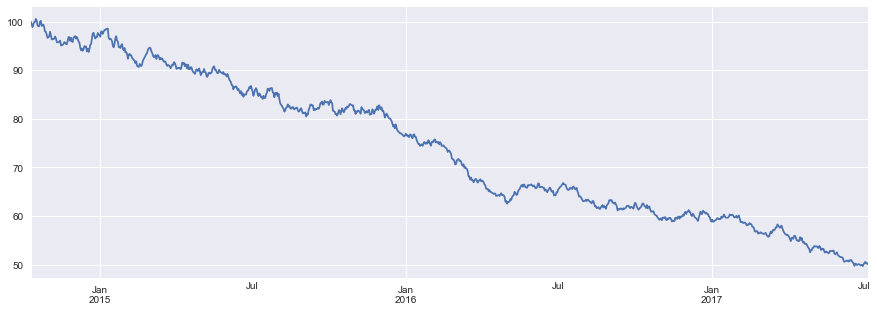

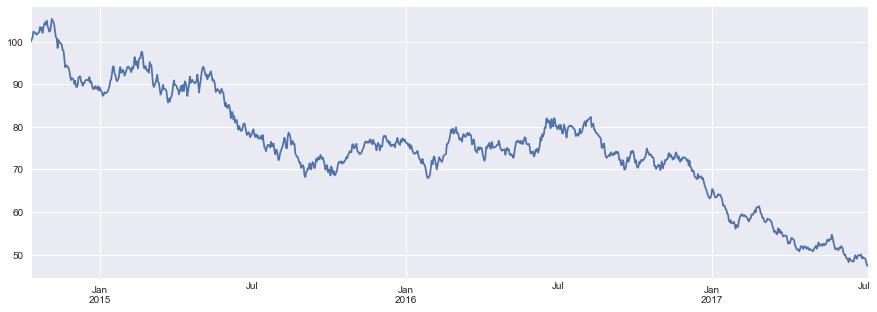

In [38]:
#plot the stocks for visual inspection

df.index = pd.to_datetime(df.index)
for i, col in enumerate(df.columns):
    if i < 30: #dont do all of it! just to validate. 
        df[col].plot()
        plt.show()